# Study of key features influencing Airbnb listing price

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
### dataset
df = pd.read_csv("../data/dataset_LA.csv")

## Data exploration

In [3]:
df.shape

(33078, 74)

In [4]:
df["has_availability"].drop_duplicates()

0    t
Name: has_availability, dtype: object

In [5]:
df["number_of_reviews_ltm"].drop_duplicates()

0          0
1          2
2          5
5         28
6         38
        ... 
23145    106
23200    103
23865    128
24857    125
26229    145
Name: number_of_reviews_ltm, Length: 135, dtype: int64

In [6]:
## distribution of the price
df["price"] = df["price"].apply(lambda x : float(x[1:].replace(",","")))

print(max(list(df["price"])))

print(min(list(df["price"])))

24999.0
0.0


(array([3.2764e+04, 2.0400e+02, 5.1000e+01, 3.1000e+01, 1.8000e+01,
        4.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([    0. ,  2499.9,  4999.8,  7499.7,  9999.6, 12499.5, 14999.4,
        17499.3, 19999.2, 22499.1, 24999. ]),
 <a list of 10 Patch objects>)

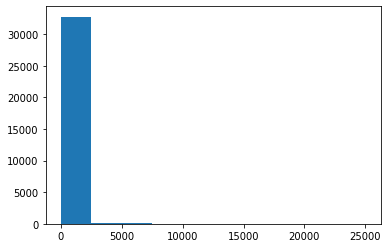

In [7]:
## draw histogram of price
plt.hist(df["price"])

(array([ 152., 1965., 3970., 4472., 4327., 3058., 2766., 2196., 1360.,
        1704.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

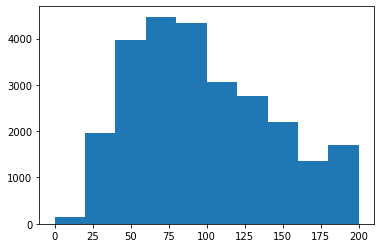

In [8]:
## draw histogram of price in [0,200] due to the outliers
plt.hist(df["price"], range = [0, 200])

In [9]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [10]:
feature_list_1 =df[["host_since", "host_is_superhost","host_listings_count","host_total_listings_count","host_verifications","latitude","longitude","accommodates","bathrooms","bathrooms_text","bedrooms","beds","amenities","minimum_nights","price","review_scores_rating"]]    
    

In [11]:
feature_list_1

,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,minimum_nights,price,review_scores_rating
0,2008-06-27,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",33.98209,-118.38494,6,NaN,2 baths,2.0,3.0,"[""Smoke alarm"", ""Hot tub"", ""Indoor fireplace"",...",30,115.0,80.0
1,2008-07-11,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",34.16562,-118.33458,6,NaN,1 bath,3.0,3.0,"[""Fireplace guards"", ""Children\u2019s dinnerwa...",2,176.0,97.0
2,2008-09-16,t,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",34.09768,-118.34602,1,NaN,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Hot tub"", ""Indoor fireplace"",...",30,67.0,97.0
3,2008-09-17,f,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",34.00475,-118.48127,1,NaN,1 private bath,1.0,1.0,"[""Oven"", ""Smoke alarm"", ""Hangers"", ""Host greet...",1,155.0,94.0
4,2008-09-25,f,1.0,1.0,"['email', 'phone', 'facebook', 'kba']",33.87619,-118.11397,2,NaN,1 bath,1.0,1.0,"[""Smoke alarm"", ""Microwave"", ""Free parking on ...",30,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33073,2018-01-20,f,2.0,2.0,"['email', 'phone', 'jumio', 'offline_governmen...",34.06080,-118.29002,2,NaN,1 bath,1.0,1.0,"[""Pool"", ""Smoke alarm"", ""Gym"", ""TV"", ""Dryer"", ...",3,90.0,NaN
33074,2020-06-03,f,6.0,6.0,"['email', 'phone', 'offline_government_id', 's...",34.16341,-118.06708,2,NaN,1 bath,2.0,2.0,"[""Wifi"", ""Washer"", ""Dryer"", ""Kitchen"", ""Heatin...",14,80.0,NaN
33075,2020-06-01,f,2.0,2.0,"['email', 'phone', 'offline_government_id', 's...",34.09791,-118.29571,1,NaN,1 shared bath,1.0,NaN,"[""Smoke alarm"", ""Hangers"", ""Lock on bedroom do...",31,36.0,NaN
33076,2016-11-22,f,0.0,0.0,"['email', 'phone']",34.18122,-118.22709,2,NaN,1 bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Smoke alarm"", ""Hang...",20,38.0,NaN


In [12]:
import datetime
### return the date difference btw two dates
def date_abs(date1, date2):
    try:
        year1, month1, date1 = date1.split('-')
        year2, month2, date2 = date2.split('-')
        dat1 = datetime.date(int(year1), int(month1), int(date1))
        dat2 = datetime.date(int(year2), int(month2), int(date2))
        x = abs(dat1-dat2)
        x = str(x).split('days')[0]
        x = x.replace("'","")
        x = x.replace(" ","")
        
        return int(x)
    except:
        return -1
    
#     str(date_abs("2016-11-11", "2020-07-20")).split('days')[0]
#     def to_int(x):
#     x = x.replace("'","")
#     x = x.replace(" ","")
#     try:
#         x = int(x)
#     except:
#         x = x
#         print(x)
#     return x

In [13]:
## true --> 1, false --> 0, Nan --> -1
def tf_to_int(x):
    if x == 't' or x =='T':
        return 1
    if x == 'f' or x =='F':
        return 0
    else:
        return -1
    
def nan_to_neg1(x):
    if x != None:
        return x
    else:
        return -1

In [14]:
## calculate the distance between two places with lng, lat
import math
def distance(lon1,lat1, lon2, lat2):
    R = 6373.0
    lon1 = math.radians(lon1)
    lon2 = math.radians(lon2)
    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)
    dlon = lon2 - lon1

    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

In [15]:
str(date_abs("2016-11-11", "2020-07-20")).split('days')[0]

'1347'

In [16]:
feature_list_1["host_since"] = feature_list_1["host_since"].apply(lambda x :date_abs(x, "2020-10-17"))
feature_list_1['host_is_superhost'] = feature_list_1['host_is_superhost'].apply(lambda x : int(tf_to_int(x)))



feature_list_1["host_listings_count"] = feature_list_1["host_listings_count"].apply(lambda x : nan_to_neg1(x))

feature_list_1["host_total_listings_count"] = feature_list_1["host_total_listings_count"].apply(lambda x : nan_to_neg1(x))
feature_list_1["accommodates"] = feature_list_1["accommodates"].apply(lambda x : nan_to_neg1(x))
feature_list_1["bedrooms"] = feature_list_1["bedrooms"].apply(lambda x : nan_to_neg1(x))
feature_list_1["beds"] = feature_list_1["beds"].apply(lambda x : nan_to_neg1(x))
feature_list_1["minimum_nights"] = feature_list_1["minimum_nights"].apply(lambda x : nan_to_neg1(x))
feature_list_1["review_scores_rating"] = feature_list_1["review_scores_rating"].apply(lambda x : nan_to_neg1(x))
feature_list_1["price"] = feature_list_1["price"].apply(lambda x : nan_to_neg1(x))

feature_list_1["host_verifications"] = feature_list_1["host_verifications"].apply(lambda x : len(x.strip('][').split(', ')))

#lax airport :  lat :  33.9416° N,lng 118.4085° W

## make a new feature distance_btw_lax
feature_list_1["distance_btw_lax"] = feature_list_1.apply(lambda x: distance(x["longitude"], x["latitude"],-118.4085, 33.9416,), axis=1)


In [17]:
## created feature : distance from lax airport
feature_list_1["distance_btw_lax"]

0         5.000751
1        25.832095
2        18.291401
3         9.715794
4        28.145402
           ...    
33073    17.180018
33074    39.983620
33075    20.258590
33076    31.461297
33077    16.048098
Name: distance_btw_lax, Length: 33078, dtype: float64

In [18]:
## groupby the number of bathrooms
feature_list_1.groupby("bathrooms_text").agg(bathrooms_count = pd.NamedAgg('bathrooms_text', 'count'))
# country.groupby('Continent').agg(max_gnp = pd.NamedAgg('GNP', 'max’))
# my["amenities"][0] ## 270 amenities

,bathrooms_count
bathrooms_text,
0 baths,58
0 shared baths,51
1 bath,14204
1 private bath,3648
1 shared bath,4254
1.5 baths,1321
1.5 shared baths,766
10 baths,6
10.5 baths,3


In [19]:
feature_list_1["bathrooms_text"].unique()

array(['2 baths', '1 bath', '1.5 baths', '1 private bath',
       '1 shared bath', '1.5 shared baths', '2.5 baths', '2 shared baths',
       '3.5 baths', '11 shared baths', '3 baths', nan, '4 baths',
       '8 shared baths', '0 shared baths', '8 baths', '0 baths',
       '4.5 baths', '7.5 baths', '2.5 shared baths', '3.5 shared baths',
       '5 baths', 'Private half-bath', 'Half-bath', '3 shared baths',
       '11.5 shared baths', '6.5 baths', '4.5 shared baths', '5.5 baths',
       'Shared half-bath', '8.5 baths', '6 baths', '5 shared baths',
       '13.5 baths', '4 shared baths', '11 baths', '7 baths', '9 baths',
       '10.5 baths', '12.5 baths', '10 baths', '9.5 baths', '11.5 baths',
       '6 shared baths', '13 baths', '8.5 shared baths',
       '5.5 shared baths', '27 baths'], dtype=object)

In [20]:
type(list(feature_list_1["bathrooms_text"].unique())[11])
import math
x = float('nan')
math.isnan(x)

True

In [22]:
import math
def preprocess_bathrooms_text(x):
    if x == 'Private half-bath':
        x = 1/2
    elif x == 'Half-bath':
        x = 1/2
    elif x == 'Shared half-bath':
        x = 1/2
    else:
        try :
            x =  x.split(" ")[0]
            x = float(x)
        except :
            ## if x is nan
#             print(x)
            x = -1
            
    return x
        
        

In [23]:
feature_list_1["bathrooms"] = feature_list_1["bathrooms_text"].apply(lambda x: preprocess_bathrooms_text(x))

In [24]:
## get distinct amenity set
import json
amenity_set = []
for i in list(feature_list_1["amenities"]):
    a = json.loads(i)
    amenity_set+=a
amenity_set = set(amenity_set)

In [25]:
len(amenity_set)

270

In [26]:
amenity = feature_list_1[["amenities"]]

In [27]:
## one_hot_encoding of amenities
def one_hot(list1, obj):
    if obj in list1:
        return 1
    else:
        return 0
for i in amenity_set:
    amenity[i] = feature_list_1["amenities"].apply(lambda x : one_hot(x, i))

In [28]:
amenity

,amenities,Heating,Self check-in,Outdoor pool,Dual vanity,Exercise equipment,Nest thermometer,Smart TV,DVD player,Doorman,...,First aid kit,Beach chairs,Onsite rooftop bar — High Rooftop Lounge,Outlet covers,Desk,Pond,Electric blinds,Covered parking,Changing table,Cable TV
0,"[""Smoke alarm"", ""Hot tub"", ""Indoor fireplace"",...",1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,"[""Fireplace guards"", ""Children\u2019s dinnerwa...",1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,"[""Smoke alarm"", ""Hot tub"", ""Indoor fireplace"",...",1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,"[""Oven"", ""Smoke alarm"", ""Hangers"", ""Host greet...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[""Smoke alarm"", ""Microwave"", ""Free parking on ...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33073,"[""Pool"", ""Smoke alarm"", ""Gym"", ""TV"", ""Dryer"", ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33074,"[""Wifi"", ""Washer"", ""Dryer"", ""Kitchen"", ""Heatin...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33075,"[""Smoke alarm"", ""Hangers"", ""Lock on bedroom do...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33076,"[""Carbon monoxide alarm"", ""Smoke alarm"", ""Hang...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
feature_list_1["amenity_num"] = feature_list_1["amenities"].apply(lambda x:len(x))

In [30]:
feature_list_1.columns

Index(['host_since', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'minimum_nights', 'price', 'review_scores_rating',
       'distance_btw_lax', 'amenity_num'],
      dtype='object')

In [31]:
my1 = feature_list_1[["price","review_scores_rating","bedrooms","beds"]]

In [32]:
my1 = my1.dropna()

In [33]:
feature_list_1.columns

Index(['host_since', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'minimum_nights', 'price', 'review_scores_rating',
       'distance_btw_lax', 'amenity_num'],
      dtype='object')

In [34]:
data = feature_list_1[['host_since', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'latitude',
       'longitude','distance_btw_lax', 'accommodates', 'bedrooms',
       'beds',  'bathrooms','amenity_num', 'review_scores_rating', 'price'
       ]]

In [35]:
data

,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,distance_btw_lax,accommodates,bedrooms,beds,bathrooms,amenity_num,review_scores_rating,price
0,4495,0,1.0,1.0,5,33.98209,-118.38494,5.000751,6,2.0,3.0,2.0,338,80.0,115.0
1,4481,0,1.0,1.0,6,34.16562,-118.33458,25.832095,6,3.0,3.0,1.0,642,97.0,176.0
2,4414,1,2.0,2.0,7,34.09768,-118.34602,18.291401,1,1.0,1.0,1.5,660,97.0,67.0
3,4413,0,2.0,2.0,8,34.00475,-118.48127,9.715794,1,1.0,1.0,1.0,233,94.0,155.0
4,4405,0,1.0,1.0,4,33.87619,-118.11397,28.145402,2,1.0,1.0,1.0,363,NaN,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33073,1001,0,2.0,2.0,7,34.06080,-118.29002,17.180018,2,1.0,1.0,1.0,160,NaN,90.0
33074,136,0,6.0,6.0,6,34.16341,-118.06708,39.983620,2,2.0,2.0,1.0,109,NaN,80.0
33075,138,0,2.0,2.0,6,34.09791,-118.29571,20.258590,1,1.0,NaN,1.0,94,NaN,36.0
33076,1425,0,0.0,0.0,2,34.18122,-118.22709,31.461297,2,1.0,1.0,1.0,216,NaN,38.0


In [36]:
data = data.fillna(-1)

In [37]:
data.to_csv("../data/intermediate_output_Jae.csv", header = True)